In [3]:
f = open('/storage/NFS/ROTATION_PROJECT/daisy/Winzeler_databases/PlasmDBv29AnnotationsforMZstudy.txt', 'r')
header_items = f.readline().strip('\n').split('\t')
print(header_items)

gene_class_dict = {}

possible_target_classes = set()
likely_target_values = set()
nontarget_classes = set()

for line in f:
    items = line.strip('\n').split('\t')
    gene_id = items[0]
    nonessential = items[header_items.index('Nonessential')]
    class_field = items[header_items.index('Class')]
    category_field = items[header_items.index('Category')]
    target_class = items[header_items.index('Target Class')]
    likely_target = items[header_items.index('Field 24')]
    if likely_target == 'no' or target_class == 'Not Predicted Target':
        nontarget_classes.add(target_class)
    else:
        likely_target_values.add(likely_target)
        possible_target_classes.add(target_class)
    gene_class_dict[gene_id] = (nonessential, target_class, likely_target, class_field, category_field)
    
aa3_to_aa1_dict = {"Ala": "A", "Arg": "R", "Asn": "N", "Asp": "D", "Cys": "C", "Glu": "E", "Gln": "Q", "Gly": "G", 
                   "His": "H", "Ile": "I", "Leu": "L", "Lys": "K", "Met": "M", "Phe": "F", "Pro": "P", "Ser": "S", 
                   "Thr": "T", "Trp": "W", "Tyr": "Y", "Val": "V", "Ter": "Ter"}

def aa_change_to_abbr(aa_change):
    if 'p.' not in aa_change:
        return aa_change
    aa_change_only = aa_change.split('/')[0].split('p.')[1]
    aa1_1 = aa3_to_aa1_dict[aa_change_only[:3]]
    if aa_change_only[-3:] in aa3_to_aa1_dict:
        aa1_2 = aa3_to_aa1_dict[aa_change_only[-3:]]
        return aa1_1 + aa_change_only[3:-3] + aa1_2
    else:
        return aa1_1 + aa_change_only[3:]

known_targets = [lambda gene: gene == 'PF3D7_0603300', # DHODH
                 lambda gene: gene == 'mal_mito_3', # Cytochrome b
                 lambda gene: '--tRNA ligase' in gene_desc_dict[gene], # Various aaRS
                 lambda gene: 'proteasome' in gene_desc_dict[gene] and 'subunit' in gene_desc_dict[gene], # Proteasome
                 lambda gene: gene == 'PF3D7_0417200', # DHFR
                 lambda gene: gene == 'PF3D7_0627800', # AcAS
                 lambda gene: gene == 'PF3D7_1238800', # ACS11
                 lambda gene: gene == 'PF3D7_1211900', # ATP4
                 lambda gene: gene == 'PF3D7_1114700', # CLK3
                 lambda gene: gene == 'PF3D7_1438500', # CPSF3
                 lambda gene: gene == 'PF3D7_1443700', # DPCK
                 lambda gene: gene == 'PF3D7_1451100', # eEF2
                 lambda gene: gene == 'PF3D7_1147500', # Ftbeta
                 lambda gene: gene == 'PF3D7_0823300', # GCN5
                 lambda gene: gene == 'PF3D7_1128400', # GGPPS
                 lambda gene: gene == 'PF3D7_0204700', # HT1
                 lambda gene: gene == 'PF3D7_0107500', # NCR1
                 lambda gene: gene == 'PF3D7_1412800', # NMT1
                 lambda gene: gene == 'PF3D7_0915400', # PFK9
                 lambda gene: gene == 'PF3D7_0509800', # PI4K
                 lambda gene: gene == 'PF3D7_1436600', # PKG
                 lambda gene: gene == 'PF3D7_0808200', # PMX
                 lambda gene: gene == 'PF3D7_0810800', # PPPK-DHPS
                ]

known_target_abbr_dict = {'PF3D7_0603300': 'DHODH', 'mal_mito_3': 'CYTB', 'PF3D7_0417200': 'DHFR', 'PF3D7_0627800': 'AcAS', 
                          'PF3D7_1238800': 'ACS11', 'PF3D7_1211900': 'ATP4', 'PF3D7_1114700': 'CLK3', 'PF3D7_1438500': 'CPSF3', 
                          'PF3D7_1443700': 'DPCK', 'PF3D7_1451100': 'eEF2', 'PF3D7_1147500': 'Ftbeta', 'PF3D7_0823300': 'GCN5', 
                          'PF3D7_1128400': 'GGPPS', 'PF3D7_0204700': 'HT1', 'PF3D7_0107500': 'NCR1', 'PF3D7_1412800': 'NMT1', 
                          'PF3D7_0915400': 'PFK9', 'PF3D7_0509800': 'PI4K', 'PF3D7_1436600': 'PKG', 'PF3D7_0808200': 'PMX', 
                          'PF3D7_0810800': 'PPPK-DHPS'}

def is_known_target(gene):
    if gene not in gene_desc_dict:
        return False
    for target_func in known_targets:
        if target_func(gene) is True:
            return True
    return False

def aa_change_to_idx(aa_change):
    num_str = ''
    first_num_seen = False
    for char in aa_change:
        if char.isnumeric():
            first_num_seen = True
            num_str += char
        elif first_num_seen:
            break
    
    return int(num_str)

def is_multigene_family(gene):
    for keyword in ['PfEMP1', 'rifin', 'stevor']:
        if keyword in gene_desc_dict[gene]:
            return True
    return False

['_Gene ID_', '_Transcript ID_', '_Organism_', '_Genomic Location _Gene__', '_Product Description (old)', '__Gene_Name_or_Symbol_', '_Chromosome_', '_EC numbers_', '_Protein Length_', '_EC numbers from OrthoMCL_', 'Paralog count', 'background gene', 'pI3K NS variants', 'RATIO', 'Field 23', 'Field 24', 'MalDA target', 'Pfam domain', 'Field 27', 'Found in human druggable genome', 'Nonessential', 'Target Class', 'Mammalian ortholog', 'Field 32', 'Target Class Count', 'Field 34', 'Field 35', 'Field 36', 'sporozoite expression', 'manhattanposition', 'neg lopP total variant', 'neg lopP alleles', 'neg lopP cnvs', 'Niles Priority', 'Howick cluster', 'Howick cluster Count', 'Class', 'Class Count', 'Piggybac Mutant Fitness Score', 'Category', 'Category Count']


# Genome coverage

In [1]:
from collections import defaultdict

# Parses output of bedtools genomecov -d

fpath = '/storage/NFS/ANALYSIS/DNAseq/BAM_coverage/p_fal_BMGF-Fidock-8149R1-B2_p.genomecov.txt'
f = open(fpath, 'r')

chrom_pos_cov_dict = defaultdict(dict)
for line in f:
    items = line.strip().split('\t')
    chrom = items[0]; pos = int(items[1]); coverage = int(items[2])
    chrom_pos_cov_dict[chrom][pos] = coverage

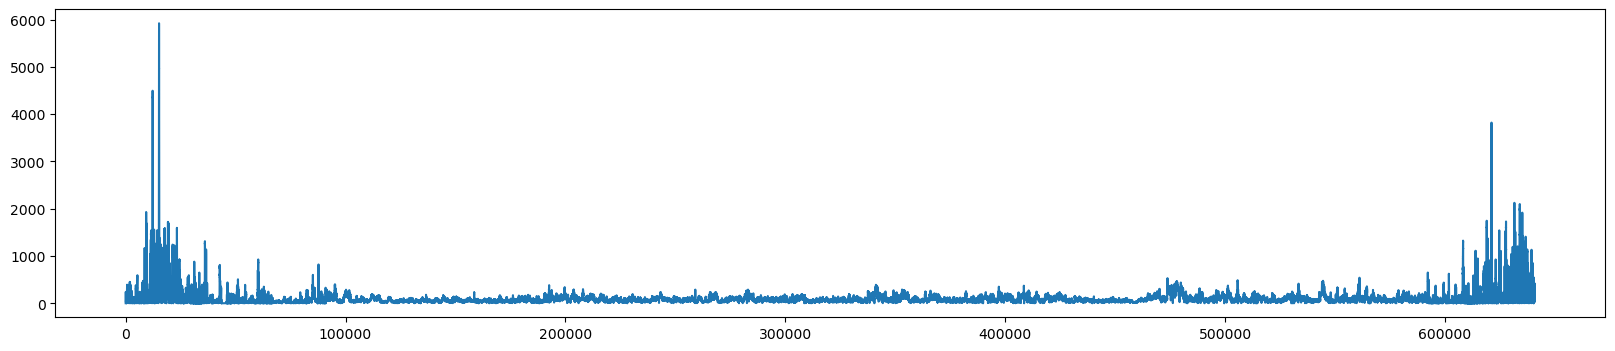

In [2]:
chrom = 'Pf3D7_01_v3'

pos_list = sorted(chrom_pos_cov_dict[chrom])
cov_list = [chrom_pos_cov_dict[chrom][pos] for pos in pos_list]

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(pos_list, cov_list)

# Compare VCFs

In [1]:
from collections import defaultdict
import pandas as pd
import os
import pickle
from tqdm import tqdm
from urllib.parse import unquote

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
matplotlib.rcParams["figure.dpi"] = 300

In [3]:
# ============================
# Load gene information
# ============================

gff_fpath = "/storage/NFS/GENOME_RESOURCES/pf/p_fal_ref/p_fal.gff"

chromosomes = []
for line in open(gff_fpath, 'r'):
    if line[0] != '#':
        break
    if line[:17] == '##sequence-region':
        chromosomes.append(line.strip().split()[1])

nuclear_chromosomes = sorted(chromosomes[2:])
chrom_gene_exon_interval_dict = {chrom: defaultdict(dict) for chrom in chromosomes} # chrom -> gene ID -> exon ID -> (start, end, strand_direction)

chrom_gene_ids_dict = {chrom: set() for chrom in chromosomes} # All protein coding gene IDs
chrom_gene_desc_dict = {chrom: {} for chrom in chromosomes} # gene_id -> description
chrom_gene_interval_dict = {chrom: {} for chrom in chromosomes} # gene_id -> (start, end, strand_direction)

for line in open(gff_fpath, 'r'):
    if line.strip() == '##FASTA':
        break
    if line[0] == '#':
        continue
    chrom, source, feature_type, start_pos, end_pos, _, sdirection, _, info = line.strip().split('\t')
    start_pos = int(start_pos); end_pos = int(end_pos)
    if feature_type == 'exon':
        exon_id = info.split(';')[0].split('ID=')[1]
        gene_id = exon_id.split('exon_')[1].split('-')[0]
        chrom_gene_exon_interval_dict[chrom][gene_id][exon_id] = (start_pos, end_pos, sdirection)
    if feature_type == 'gene':
        gene_id = info.split(';')[0].split('ID=')[1]
        gene_desc = info.split(';')[2].split('description=')[1]
        chrom_gene_desc_dict[chrom][gene_id] = unquote(gene_desc.strip()).replace('+', ' ')
        chrom_gene_interval_dict[chrom][gene_id] = (start_pos, end_pos, sdirection)
    if feature_type == 'CDS': # Actually coding
        gene_id = info.split(';')[0].split('ID=')[1].split('cds_')[1].split('-')[0]
        if gene_id != 'PF3D7_0112400' and 'pseudogene' not in chrom_gene_desc_dict[chrom][gene_id]: # Ignore pseudogenes
            chrom_gene_ids_dict[chrom].add(gene_id)

total_num_coding_genes = sum([len(chrom_gene_ids_dict[chrom]) for chrom in chromosomes])
alt_order_chromosomes = ['Pf3D7_01_v3', 'Pf3D7_06_v3', 'Pf3D7_11_v3', 'Pf3D7_02_v3', 'Pf3D7_07_v3', 'Pf3D7_12_v3', 
                         'Pf3D7_03_v3', 'Pf3D7_08_v3', 'Pf3D7_13_v3', 'Pf3D7_04_v3', 'Pf3D7_09_v3', 'Pf3D7_14_v3', 
                         'Pf3D7_05_v3', 'Pf3D7_10_v3', 'M76611', 'PFC10_API_IRAB']
for chrom_i in range(0, len(alt_order_chromosomes[:-2]), 3):
    print("\t".join(["%s\t%i" % (chrom, len(chrom_gene_ids_dict[chrom])) for chrom in alt_order_chromosomes[chrom_i:chrom_i+3]]))
print('\n' + "\t".join(["%s\t%i" % (chrom, len(chrom_gene_ids_dict[chrom])) for chrom in ['M76611', 'PFC10_API_IRAB']]) + '\n')
print("Total number of protein coding genes: %i" % total_num_coding_genes)

Pf3D7_01_v3	135	Pf3D7_06_v3	320	Pf3D7_11_v3	485
Pf3D7_02_v3	223	Pf3D7_07_v3	295	Pf3D7_12_v3	531
Pf3D7_03_v3	243	Pf3D7_08_v3	317	Pf3D7_13_v3	699
Pf3D7_04_v3	235	Pf3D7_09_v3	383	Pf3D7_14_v3	775
Pf3D7_05_v3	312	Pf3D7_10_v3	414	M76611	3

M76611	3	PFC10_API_IRAB	30

Total number of protein coding genes: 5400


In [4]:
def get_format_data_dict(FORMAT, data):
    return {key: val for key, val in zip(FORMAT.split(':'), data.split(':'))}

In [5]:
vcf_dir = '/storage/NFS/ANALYSIS/DNAseq/VCF_ann'
vcf = 'p_fal_Fidock-Dd2Parent_p_Unfiltered.vcf'
f = open('%s/%s.ann.txt' % (vcf_dir, vcf))

for line in f:
    if line.startswith('#CHROM'):
        header_items = line.strip().split('\t')
        break    

mutation_records = []

for line in f:
    items = line.strip().split('\t')
    CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT = items[:9]; POS = int(POS)

    if QUAL == '.' or float(QUAL) < 500:
        continue

    # Allele annotations
    first_alt_allele = ALT.split(',')[0]
    pre_eff = INFO.split(';EFF=')[0]
    eff = INFO.split(';EFF=')[1].split(';')[0]

    allele_anno_dict = {}
    for anno in eff.split(','):
        last = anno.split('|')[-1]
        if 'INFO_' in last or 'WARNING_' in last or 'ERROR_' in last:
            alt_allele = anno.split('|')[-2].split(')')[0]
        else:
            alt_allele = anno.split('|')[-1].split(')')[0]
        effect, rest = anno.split('(')
        impact, codon_change, aa_change, _, gene = rest.split('|')[1:6]
        vtype = 'SNP' if (REF in ['A', 'C', 'G', 'T'] and alt_allele in ['A', 'C', 'G', 'T']) else 'INDEL'
        allele_anno_dict[alt_allele] = (vtype, effect, impact, codon_change, aa_change, gene)

    data = items[9]
    data_dict = get_format_data_dict(FORMAT, data)
    GT = data_dict['GT']; AD = data_dict['AD']
    
    major_alt_allele = ALT.split(',')[0]; major_alt_allele_depth = -1
    for i, depth in enumerate(AD.split(',')[1:]):
        if int(depth) > major_alt_allele_depth:
            major_alt_allele_depth = int(depth)
            major_alt_allele = ALT.split(',')[i]
    
    vtype, effect, impact, codon_change, aa_change, gene = allele_anno_dict[major_alt_allele]
    
    if impact != 'MISSENSE':
        continue
    
    # items = [CHROM, POS, REF, ALT, QUAL, GT, AD, vtype, effect, impact, codon_change, aa_change, gene]
    items = [gene, aa_change.split('/')[0].split('p.')[1], chrom_gene_desc_dict[CHROM][gene]]
    print('\t'.join([str(item) for item in items]))

PF3D7_0400100	Glu367Asp	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Lys378Glu	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Asn379Lys	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Val386Asp	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Asp390Glu	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Phe391Val	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Phe391Tyr	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Asp392Val	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Pro402Arg	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Asp405Asn	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Gln566Lys	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Glu922Gln	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Lys924Glu	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Glu927Lys	erythrocyte membrane protein 1, PfEMP1 (VAR)
PF3D7_0400100	Gln929Glu	erythrocyt

PF3D7_1000400	Ile341Val	rifin,PIR protein (RIF)
PF3D7_1000400	Val338Glu	rifin,PIR protein (RIF)
PF3D7_1000400	Thr322Ala	rifin,PIR protein (RIF)
PF3D7_1000400	Ala47Thr	rifin,PIR protein (RIF)
PF3D7_1000600	Met354Ile	rifin,PIR protein (RIF)
PF3D7_1000600	Gly278Glu	rifin,PIR protein (RIF)
PF3D7_1000600	Glu273Lys	rifin,PIR protein (RIF)
PF3D7_1000600	Gly269Ala	rifin,PIR protein (RIF)
PF3D7_1000600	Ala268Thr	rifin,PIR protein (RIF)
PF3D7_1000600	Lys266Asn	rifin,PIR protein (RIF)
PF3D7_1000600	Ser263Asn	rifin,PIR protein (RIF)
PF3D7_1000600	Lys258Arg	rifin,PIR protein (RIF)
PF3D7_1000600	Val244Gly	rifin,PIR protein (RIF)
PF3D7_1000600	Thr196Asn	rifin,PIR protein (RIF)
PF3D7_1000600	Gly131Ala	rifin,PIR protein (RIF)
PF3D7_1000700	Ala216Asp	Plasmodium exported protein (PHISTa), unknown function, pseudogene
PF3D7_1000700	Cys215Tyr	Plasmodium exported protein (PHISTa), unknown function, pseudogene
PF3D7_1000700	Cys215Arg	Plasmodium exported protein (PHISTa), unknown function, pseudogene
PF3D7_10

In [6]:
f = open('/storage/NFS/ANALYSIS/DNAseq/PfResistome_2023/daisy_test/Sequenced_Clone_Metadata_10-17-2023_v2.txt', 'r')
header = f.readline().rstrip('\n')

clone_vcf_dict = defaultdict(dict) # strain -> sample -> vcf
clone_parent_dict = {} # sample -> parent

for line in f:
    _, _, lab, strain, compound, alias, sample, parent, _, target, driver, \
    vcf, _, _, parent_vcf, parent_in_same_vcf = line.rstrip('\n').split('\t')[:16]
    
    clone_vcf_dict[sample] = vcf
    clone_parent_dict[sample] = parent

In [7]:
def get_possible_variants(focal_sample):
    vcf_dir = '/storage/NFS/ANALYSIS/DNAseq/VCF_ann'
    vcf = clone_vcf_dict[focal_sample]
    f = open('%s/%s.ann.txt' % (vcf_dir, vcf))
    
    for line in f:
        if line.startswith('#CHROM'):
            header_items = line.strip().split('\t')
            break    
    
    mutation_records = []
    site_allele_anno_dict = defaultdict(dict)
    
    for line in f:
        items = line.strip().split('\t')
        CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT = items[:9]; POS = int(POS)

        if QUAL == '.' or float(QUAL) < 500:
            continue
        
        # Allele annotations
        first_alt_allele = ALT.split(',')[0]
        pre_eff = INFO.split(';EFF=')[0]
        eff = INFO.split(';EFF=')[1].split(';')[0]
        
        allele_anno_dict = {}
        for anno in eff.split(','):
            last = anno.split('|')[-1]
            if 'INFO_' in last or 'WARNING_' in last or 'ERROR_' in last:
                alt_allele = anno.split('|')[-2].split(')')[0]
            else:
                alt_allele = anno.split('|')[-1].split(')')[0]
            effect, rest = anno.split('(')
            impact, codon_change, aa_change, _, gene = rest.split('|')[1:6]
            vtype = 'SNP' if (REF in ['A', 'C', 'G', 'T'] and alt_allele in ['A', 'C', 'G', 'T']) else 'INDEL'
            allele_anno_dict[alt_allele] = (vtype, effect, impact, codon_change, aa_change, gene)
        
        for idx in range(9, len(items)):
            
            sample = header_items[idx]
            if sample != focal_sample:
                continue
            
            parent_sample = clone_parent_dict[sample]
            if parent_sample == "IS_PARENT":
                continue
            
            parent_data = items[header_items.index(parent_sample)]
            parent_data_dict = get_format_data_dict(FORMAT, parent_data)
            
            if parent_data_dict['GT'] == './.' or 'DP' not in parent_data_dict or \
               parent_data_dict['DP'] == '.' or int(parent_data_dict['DP']) < 7:
                continue
            
            data = items[idx]
            data_dict = get_format_data_dict(FORMAT, data)
            
            if 'DP' not in data_dict or data_dict['DP'] == '.' or int(data_dict['DP']) < 7:
                continue
            
            GT = data_dict['GT']; AD = data_dict['AD']
            
            major_alt_allele = first_alt_allele; major_alt_allele_depth = -1
            for i, depth in enumerate(AD.split(',')[1:]):
                if int(depth) > major_alt_allele_depth:
                    major_alt_allele_depth = int(depth)
                    major_alt_allele = ALT.split(',')[i]
            
            vtype, effect, impact, codon_change, aa_change, gene = allele_anno_dict[major_alt_allele]
            site_allele_anno_dict[(CHROM, POS)] = allele_anno_dict
            
            if parent_data_dict['GT'] == '0/0' and data_dict['GT'] != '0/0':
                mutation_records.append((CHROM, POS, REF, ALT, QUAL, GT, AD, parent_data_dict['GT'], parent_data_dict['AD']))
            elif parent_data_dict['GT'] != '0/0' and data_dict['GT'] == '0/0':
                mutation_records.append((CHROM, POS, REF, ALT, QUAL, GT, AD, parent_data_dict['GT'], parent_data_dict['AD']))
    
    return mutation_records, site_allele_anno_dict

In [8]:
sample = 'TM051C-E5'
clone_vcf_dict[sample] = 'catVariants_p_fal_TM051-Dd2-parent-2_raw.snps.indels.vcf'
clone_parent_dict[sample] = 'Dd2TM051parent-2'
mutation_records, site_allele_anno_dict = get_possible_variants(sample)

print()
tups = sorted(mutation_records, key=lambda x: float(x[4]))
for CHROM, POS, REF, ALT, QUAL, GT, AD, PARENT_GT, PARENT_AD in tups:
    
    parent_ADs = [int(d) for d in PARENT_AD.split(',')]
    ADs = [int(d) for d in AD.split(',')]
    
    parent_AAF = sum(parent_ADs[1:])/float(sum(parent_ADs))
    AAF = sum(ADs[1:])/float(sum(ADs))
    
    AAF_diff = AAF-parent_AAF    
    
    if abs(AAF-parent_AAF) > 0.3:
        vtype, effect, impact, codon_change, aa_change, gene = site_allele_anno_dict[(CHROM, POS)][ALT.split(',')[0]]
        desc = chrom_gene_desc_dict[CHROM][gene] if gene in chrom_gene_desc_dict[CHROM] else ''
        
        if 'EMP1' in desc or 'stevor' in desc or 'rifin' in desc or effect == 'intergenic_region':
            continue
        
        items = [QUAL, CHROM, POS, "%.02f" % AAF_diff, AD, PARENT_AD, effect, aa_change, gene, desc]
        print('\t'.join([str(item) for item in items]))


514.28	Pf3D7_12_v3	1393376	-0.41	9,0	10,7	missense_variant	p.Val2557Ala/c.7670T>C	PF3D7_1233600	asparagine and aspartate rich protein 1 (AARP1)
593.92	Pf3D7_13_v3	60977	-0.43	11,0	8,6	missense_variant	p.Asn66Asp/c.196A>G	PF3D7_1300800	erythrocyte membrane protein 1-like (VAR-like)
595.9	Pf3D7_01_v3	578746	-0.41	15,0	10,7	missense_variant	p.His295Asp/c.883C>G	PF3D7_0115000	surface-associated interspersed protein 1.3 (SURFIN 1.3) (SURF1.3)
627.9	Pf3D7_06_v3	569919	-1.00	14,0	0,9	inframe_deletion	p.Asn1264_Asn1281del/c.3790_3843delAATAATAATAATAATAATGTTCATAATAATGTTCATAATAATGTTCATAATAAT	PF3D7_0613800	transcription factor with AP2 domain(s) (ApiAP2)
827.87	Pf3D7_06_v3	569925	1.00	0,12	9,0	inframe_deletion	p.Asn1266_Asn1281del/c.3796_3843delAATAATAATAATGTTCATAATAATGTTCATAATAATGTTCATAATAAT	PF3D7_0613800	transcription factor with AP2 domain(s) (ApiAP2)
1554.9	Pf3D7_13_v3	61139	-0.31	55,0	61,27	missense_variant	p.Val12Ile/c.34G>A	PF3D7_1300800	erythrocyte membrane protein 1-like (VAR-like)
1570

In [9]:
def get_all_variants(focal_sample, quality_threshold=500, depth_threshold=7):
    vcf_dir = '/storage/NFS/ANALYSIS/DNAseq/VCF_ann'
    vcf = clone_vcf_dict[focal_sample]
    f = open('%s/%s.ann.txt' % (vcf_dir, vcf))
    
    for line in f:
        if line.startswith('#CHROM'):
            header_items = line.strip().split('\t')
            break    
    
    chrom_pos_mutation_dict = defaultdict(dict)
    
    for line in f:
        items = line.strip().split('\t')
        CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT = items[:9]; POS = int(POS)

        if QUAL == '.' or float(QUAL) < quality_threshold:
            continue
        
        # Allele annotations
        first_alt_allele = ALT.split(',')[0]
        pre_eff = INFO.split(';EFF=')[0]
        eff = INFO.split(';EFF=')[1].split(';')[0]
        
        allele_anno_dict = {}
        for anno in eff.split(','):
            last = anno.split('|')[-1]
            if 'INFO_' in last or 'WARNING_' in last or 'ERROR_' in last:
                alt_allele = anno.split('|')[-2].split(')')[0]
            else:
                alt_allele = anno.split('|')[-1].split(')')[0]
            effect, rest = anno.split('(')
            impact, codon_change, aa_change, _, gene = rest.split('|')[1:6]
            vtype = 'SNP' if (REF in ['A', 'C', 'G', 'T'] and alt_allele in ['A', 'C', 'G', 'T']) else 'INDEL'
            allele_anno_dict[alt_allele] = (vtype, effect, impact, codon_change, aa_change, gene)
        
        for idx in range(9, len(items)):
            
            sample = header_items[idx]
            data = items[idx]; data_dict = get_format_data_dict(FORMAT, data)
            
            if data_dict['GT'] == './.' or 'DP' not in data_dict or \
               data_dict['DP'] == '.' or int(data_dict['DP']) < depth_threshold:
                continue
            
            GT = data_dict['GT']; AD = data_dict['AD']
            
            major_alt_allele = first_alt_allele; major_alt_allele_depth = -1
            for i, depth in enumerate(AD.split(',')[1:]):
                if int(depth) > major_alt_allele_depth:
                    major_alt_allele_depth = int(depth)
                    major_alt_allele = ALT.split(',')[i]
            
            if major_alt_allele == '*': # Spanning deletion (ignore since deletion previously accounted for)
                continue
            
            vtype, effect, impact, codon_change, aa_change, gene = allele_anno_dict[major_alt_allele]
            
            chrom_pos_mutation_dict[CHROM][POS] = (REF, ALT, QUAL, GT, AD, major_alt_allele, vtype, effect, impact, aa_change, gene)
    
    return chrom_pos_mutation_dict

# Determine strain

In [10]:
f = open('/storage/NFS/ANALYSIS/DNAseq/PfResistome_2023/daisy_test/Sequenced_Clone_Metadata_10-17-2023_v2.txt', 'r')
header = f.readline().rstrip('\n')

strain_parent_vcfs = defaultdict(dict) # strain -> sample -> vcf

for line in f:
    _, _, lab, strain, compound, alias, sample, parent, _, target, driver, \
    vcf, _, _, parent_vcf, parent_in_same_vcf = line.rstrip('\n').split('\t')[:16]
    
    if sample == 'GSK-Dd2F-397-Parent': # Mistake
        strain = 'Dd2'
    
    if parent == 'IS_PARENT':
        strain_parent_vcfs[strain][sample] = vcf

In [11]:
def chrom_to_abbreviation(chrom):
    if chrom.startswith("Pf3D7"):
        return chrom.split("Pf3D7_")[1].split('_')[0]
    elif "API" in chrom:
        return "API"
    elif chrom == 'M76611':
        return 'MT' # Mitochondrial genome

In [12]:
# Function to get how many times alt alleles are shared in a group of samples

def compute_allele_sharing_dict(sample_mutation_records_dict, samples=None):
    if samples is None:
        samples = sample_mutation_records_dict.keys()
    
    chrom_pos_allele_sharing_dict = {chrom: defaultdict(int) for chrom in chromosomes} # chrom -> (pos, allele)-> number of samples (major)
    chrom_pos_allele_anno_dict = defaultdict(dict) # chrom -> (pos, allele) -> (vtype, effect, impact, aa_change, gene)
    for sample in samples:
        for chrom in sample_mutation_records_dict[sample]:
            for pos in sample_mutation_records_dict[sample][chrom]:
                REF, ALT, QUAL, GT, AD, major_alt_allele, \
                vtype, effect, impact, aa_change, gene = sample_mutation_records_dict[sample][chrom][pos]
                if not GT.startswith('0/'):
                    chrom_pos_allele_sharing_dict[chrom][(pos, major_alt_allele)] += 1
                    chrom_pos_allele_anno_dict[chrom][(pos, major_alt_allele)] = (vtype, effect, impact, aa_change, gene)
    
    return chrom_pos_allele_sharing_dict, chrom_pos_allele_anno_dict

In [13]:
def differs(record1, record2):
    _, _, _, GT1, _, major_alt_allele1, _, _, _, _, _ = record1
    _, _, _, GT2, _, major_alt_allele2, _, _, _, _, _ = record2
    if (not GT1.startswith('0/')): # 1 is alt
        if (not GT2.startswith('0/')): # Both alt
            return major_alt_allele1 != major_alt_allele2
        else:
            return True
    else: # 1 is ref
        return not GT2.startswith('0/')

In [14]:
def is_alt(GT):
    return not GT.startswith('0/')

In [15]:
# Find closest parent

def find_closest_parent(sample_mutation_records_dict, candidate_parent_mutation_records_dict, exclude=[]):
   
    parent_diff_sites_count_dict = defaultdict(int)
    for parent in candidate_parent_mutation_records_dict:
        
        if parent in exclude:
            continue
        
        diff_sites = set()
        for chrom in sample_mutation_records_dict:
            if chrom not in candidate_parent_mutation_records_dict[parent]:
                for pos in sample_mutation_records_dict[chrom]:
                    record = sample_mutation_records_dict[chrom][pos]
                    if is_alt(record[3]):
                        diff_sites.add((chrom, pos))
            else:
                for pos in sample_mutation_records_dict[chrom]:
                    record = sample_mutation_records_dict[chrom][pos]
                    if pos in candidate_parent_mutation_records_dict[parent][chrom]:
                        parent_record = candidate_parent_mutation_records_dict[parent][chrom][pos]
                        if differs(record, parent_record):
                            diff_sites.add((chrom, pos))
                    else:
                        if is_alt(record[3]):
                            diff_sites.add((chrom, pos))
        
        for chrom in candidate_parent_mutation_records_dict:
            if chrom not in sample_mutation_records_dict:
                for pos in candidate_parent_mutation_records_dict[parent][chrom]:
                    parent_record = candidate_parent_mutation_records_dict[parent][chrom][pos]
                    if is_alt(parent_record[3]):
                        diff_sites.add((chrom, pos))
            else:
                for pos in candidate_parent_mutation_records_dict[parent][chrom]:
                    parent_record = candidate_parent_mutation_records_dict[parent][chrom][pos]
                    if pos in sample_mutation_records_dict[chrom]:
                        record = sample_mutation_records_dict[chrom][pos]
                        if differs(record, parent_record):
                            diff_sites.add((chrom, pos))
                    else:
                        if is_alt(parent_record[3]):
                            diff_sites.add((chrom, pos))
        
        
        parent_diff_sites_count_dict[parent] = len(diff_sites)
    
    sorted_parent_count_tups = sorted(parent_diff_sites_count_dict.items(), key=lambda x: x[1])
    min_count = sorted_parent_count_tups[0][1]
    print("Candidate(s):")
    for parent, count in sorted_parent_count_tups:        
        if count > min_count:
            break
        print(count, parent)
    return sorted_parent_count_tups

In [16]:
# Find samples with given mutation
def find_sample_with_mutations(sample_mutation_records_dict, mutations, min_prop=0.85):
    sample_mutation_prop_dict = {}
    for sample in sample_mutation_records_dict:
        has_mutation_vector = []
        for chrom, pos in mutations:    
            has_mutation = (chrom in sample_mutation_records_dict[sample]) and \
                           (pos in sample_mutation_records_dict[sample][chrom]) and \
                           (not sample_mutation_records_dict[sample][chrom][pos][3].startswith('0/'))
            has_mutation_vector.append(has_mutation)
        if has_mutation_vector.count(True) > (min_prop*len(mutations)):
            sample_mutation_prop_dict[sample] = has_mutation_vector.count(True)/float(len(mutations))
    return sample_mutation_prop_dict

In [17]:
# Find all common mutations in group of samples

def get_common_mutations(sample_mutation_records_dict, samples):
    site_samples_dict = defaultdict(set)
    for sample in samples:
        for chrom in sample_mutation_records_dict[sample]:
            for pos in sample_mutation_records_dict[sample][chrom]:
                has_mutation = (not sample_mutation_records_dict[sample][chrom][pos][3].startswith('0/'))
                if has_mutation:
                    site_samples_dict[(chrom, pos)].add(sample)
    common_mutated_sites = set()
    for chrom, pos in site_samples_dict:
        if site_samples_dict[(chrom, pos)] == set(samples):
            common_mutated_sites.add((chrom, pos))
    return common_mutated_sites

In [18]:
matt_samples = '''2-1-A9
2-1-B3
2-1-D1
2-1-H8
2-2-D12
2-2-D3
2-2-F8
2-2-H1
2-3-B11
2-3-C9
2-3-F1
2-3-H6'''.split('\n')

sample_mutation_records_dict = {}
for sample in matt_samples:
    sample_mutation_records_dict[sample] = get_all_variants(sample)

common_mutations = get_common_mutations(sample_mutation_records_dict, matt_samples)

In [21]:
len(common_mutations)

56239

In [22]:
sample_mutation_prop_dict = find_sample_with_mutations(parent_mutation_records_dict, common_mutations)
sample_mutation_prop_dict

NameError: name 'parent_mutation_records_dict' is not defined

In [183]:
samples = '''Fidock-407-PI4K-R1A1
Fidock-407-PI4K-R2E10
Fidock-407-PI4K-R3C9'''.split('\n')

sample_mutation_records_dict = {}
for sample in samples:
    sample_mutation_records_dict[sample] = get_all_variants(sample)

common_mutations = get_common_mutations(sample_mutation_records_dict, samples)
print(len(common_mutations))

5187


In [186]:
sample_mutation_prop_dict = find_sample_with_mutations(parent_mutation_records_dict, common_mutations, min_prop=0.8)

In [187]:
sample_mutation_prop_dict

{'Fidock-Dd2Parent': 0.8324657798342009,
 'Fidock-Marcus-Dd2': 0.8500096394833236,
 'Fidock-PI4K-Dd2Parent': 0.8018122228648544}

# Test

In [20]:
# Store data for all parents
parent_mutation_records_dict = {}
for strain in strain_parent_vcfs:
    for sample in strain_parent_vcfs[strain]:
        try:
            parent_mutation_records_dict[sample] = get_all_variants(sample)
        except:
            continue

print(len(parent_mutation_records_dict))
parent_mutation_records_dict['Fidock-PI4K-Dd2Parent'] = get_all_variants('Fidock-PI4K-Dd2Parent')

211


In [25]:
for parent in parent_mutation_records_dict:
    if 'B2' in parent:
        print(parent)

Fidock-Dd2WT-B2
Harzianin-Dd2-B2-bulk-parent
Goldberg-Dd2-B2-Parent-3-2020
Goldberg-Dd2-B2-Fidock-Parent
Goldberg-Dd2-B2-Parent-9-2018
Goldberg-Dd2-B2-Parent
Goldberg-Dd2-B2-11-2018
Goldberg-Dd2-B2-Parent-12-2020
Goldberg-Dd2-B2-Parent-12-2020-2
Goldberg-Dd2-B2-Parent-3-2021
Fidock-Dd2B2-20170519-Parent
Fidock-Dd2-B2-Parent
Goldberg-Dd2-B2-Parent-8-2021
Fidock-Dd2B2-TKL3KO-parent


In [33]:
x = get_all_variants('Wirth-Pik1904-Parent-1')
sorted_parent_count_tups = find_closest_parent(x, parent_mutation_records_dict)
sorted_parent_count_tups

Candidate(s):
0 Wirth-Pik1904-Parent-1


[('Wirth-Pik1904-Parent-1', 0),
 ('Wirth-Pik1904-Parent-2', 12171),
 ('Wirth-Pikine19-04-parent', 14804),
 ('Fidock-Andrew-0482-E11', 43517),
 ('Fidock-Andrew-0212-B11', 43713),
 ('Goldberg-Dd2-B2-Parent-3-2020', 43777),
 ('MD133-Dd2-bulk-parent', 43780),
 ('Matt-621-Dd2P', 43822),
 ('Fidock-Andrew-0197-A9', 43830),
 ('Fidock-Andrew-0306-C5', 43838),
 ('Goldberg-Dd2-pol-delta-Parent-3-2020', 43841),
 ('Lee-Dd2pol-Parent', 43853),
 ('Goldberg-Dd2-B2-Parent-8-2021', 43868),
 ('TCOLF-Dd2pol-Parent', 43871),
 ('Wirth-Desoxyepothilone-B-Dd2-pol-delta-Parent-1-22-2020', 43885),
 ('Winzeler-UCF501-Dd2-ParentA', 43890),
 ('Winzeler-UCF501-Dd2-ParentB', 43890),
 ('Goldberg-Dd2-B2-Parent-3-2021', 43913),
 ('ERR299194-Dd2-parent', 43917),
 ('Wirth-Thies03209-Parent-2', 43924),
 ('Winzeler-MD133-Dd2-Parent', 43935),
 ('Fidock-407-Dd2Parent', 44004),
 ('Fidock-Andrew-0164-G3', 44017),
 ('Fidock-Dd2WT-B2', 44020),
 ('BMGF-Fidock-Marcus-Dd2', 44024),
 ('Goldberg-Dd2-B2-Parent-12-2020-2', 44042),
 ('W

In [36]:
samples = '''Wirth-TCMDC125334-DSM265-S2-2-F2
Wirth-TCMDC125334-DSM265-S2-F2
Wirth-TCMDC125334-DSM265-S5-3-F1
Wirth-TCMDC125334-DSM265-S5-3-F2
Wirth-TCMDC125334-DSM265-S5-F1-D3
Wirth-TCMDC125334-DSM265-S5-F1-E12
Wirth-TCMDC125334-DSM265-S5-F2-C6
Wirth-TCMDC125334-DSM265-S5-F2-E1
Wirth-TCMDC125334-S4-2-5-F1
Wirth-TCMDC125334-S4-2-5-F3'''.split('\n')
for sample in samples:
    x = get_all_variants('Wirth-TCMDC125334-DSM265-S2-F2')
    for chrom in x:
        if 382259 in x[chrom]:
            print(sample)

In [27]:
parent_mutation_records_dict['Erika-1AG2-before246'] = get_all_variants('Erika-1AG2-before246')

In [23]:
x = get_all_variants('Wirth-Thies03209-Parent-1')
sorted_parent_count_tups = find_closest_parent(x, parent_mutation_records_dict)
sorted_parent_count_tups

Candidate(s):
0 Wirth-Thies03209-Parent-1


[('Wirth-Thies03209-Parent-1', 0),
 ('Wirth-Thies03209-Parent-2', 12717),
 ('Wirth-Thies032-09-parent', 16664),
 ('Fidock-Andrew-0482-E11', 41851),
 ('Fidock-Andrew-0197-A9', 41910),
 ('Fidock-Andrew-0306-C5', 41924),
 ('Fidock-Andrew-0212-B11', 41943),
 ('Fidock-Andrew-0164-G3', 42019),
 ('Wirth-Pik1904-Parent-2', 42038),
 ('Wirth-Pik1904-Parent-1', 42122),
 ('ERR299194-Dd2-parent', 42161),
 ('Matt-621-Dd2P', 42205),
 ('ERR328387-7G8-parent', 42224),
 ('Lee-Dd2-day1-clone', 42287),
 ('Wirth-Desoxyepothilone-B-Dd2-pol-delta-Parent-1-22-2020', 42293),
 ('MD133-Dd2-bulk-parent', 42302),
 ('Yeh-W2-Parent-Clone1', 42310),
 ('Yeh-W2-Parent-Population', 42310),
 ('Yeh-Dd2-Parent', 42314),
 ('Lee-Dd2pol-day1-cloneE8', 42333),
 ('Wirth-Pikine19-04-parent', 42337),
 ('Lee-Dd2pol-Parent', 42340),
 ('Winzeler-MD133-Dd2-Parent', 42356),
 ('TCOLF-Dd2pol-Parent', 42362),
 ('Goldberg-Dd2-pol-delta-Parent-3-2020', 42363),
 ('Goldberg-Dd2-B2-Parent-3-2020', 42376),
 ('Winzeler-UCF501-Dd2-ParentA', 4238

In [25]:
mutation_records = get_all_variants('Erika-1AG2-before246')
sorted_parent_count_tups = find_closest_parent(mutation_records, parent_mutation_records_dict)

Candidate(s):
1289 Fidock-Marcus-Dd2


In [26]:
sorted_parent_count_tups

[('Fidock-Marcus-Dd2', 1289),
 ('Lee-Dd2-DNAdeltapol-parent', 2894),
 ('GHDDI-YJ-Dd2-WT', 3090),
 ('Wirth-Halofuginone-Dd2-AH11-36-LFI', 3126),
 ('Dd2TM051parent-1', 3141),
 ('GHDDI-Na-Dd2-WT', 3143),
 ('GHDDI-xiu-Dd2-WT-191024', 3157),
 ('Wirth-Halofuginone-Dd2-TC-Parent-LFA', 3166),
 ('BMGF-Fidock-Dd2exo1', 3173),
 ('GSK-Dd2F-405-Parent', 3175),
 ('Goldberg-Dd2-B2-11-2018', 3183),
 ('Dd2parent', 3186),
 ('GHDDI-Dd2-WT-YJ', 3193),
 ('Fidock-Dd2WT-B2', 3202),
 ('SRR3091181-GNF179-Dd2-Parent', 3203),
 ('Wirth-Halofuginone-Dd2-OC12-ParentLFC', 3205),
 ('Goldberg-Dd2-B2-Parent-9-2018', 3212),
 ('ERR299194-Dd2-parent', 3215),
 ('Fidock-Exo1-MarcusParent', 3242),
 ('PabloGNF-Dd2Parent-KAF179', 3244),
 ('Wirth-Halofuginone-Dd2-OD12-LFE', 3248),
 ('MD133-Dd2-bulk-parent', 3248),
 ('Lee-Dd2pol-Parent', 3249),
 ('Winzeler-ABS11-Dd2-Parent-Bulk', 3260),
 ('Goldberg-Dd2-B2-Fidock-Parent', 3262),
 ('Goldberg-Dd2-B2-Parent-3-2021', 3263),
 ('Winzeler-Dd2-Parent-2-2018', 3264),
 ('Lee-Dd2-day1-clone

In [190]:
mutation_records = get_all_variants('BMGF-Goldberg-81-1D')
sorted_parent_count_tups = find_closest_parent(mutation_records, parent_mutation_records_dict)

Candidate(s):
13 BMGF-Goldberg-3D7A10Parent


In [191]:
sorted_parent_count_tups

[('BMGF-Goldberg-3D7A10Parent', 13),
 ('BMGF-Goldberg-3D7-9063', 20),
 ('BMGF-GSK-3D7P3', 21),
 ('Goldberg-3D7-PMZ-H11', 22),
 ('Goldberg-3D7-A10-Parent', 23),
 ('BMGF-Winzeler-3D7-4539', 24),
 ('Wirth-Goldberg-3D7-A10-C276Y-Parent', 24),
 ('PabloGNF-3D7Parent-789', 25),
 ('BMGF-Wirth-3D7-11-1-13', 25),
 ('BMGF-Wirth-668399-3D7P', 25),
 ('SRR3722054-3D7-Parent-fixed', 25),
 ('BMGF-Fidock-029272-3D7P', 26),
 ('BMGF-Goldberg-11438-DR-3D7P', 26),
 ('BMGF-Winzeler-5391-3D7Parent', 26),
 ('BMGF-Wirth-3D7-11895', 26),
 ('Wirth-3D7G-Parent-12-2018', 26),
 ('Wirth-3D7-Goldberg-Parent', 26),
 ('Wirth-MMV008434-3D7-A10-Parent', 26),
 ('BMGF-Fidock-3D7P-852-7224-SOFTCLIP', 27),
 ('Goldberg-3D7-A10-Parent-3-2020', 27),
 ('SRR3239848-GNF179-S1-Dd2-Parent', 27),
 ('Goldberg-3D7Parent-789', 28),
 ('Goldberg-3D7-PMY-C5', 28),
 ('Wirth-MMV019721-3D7-RS1C-P1-2802193D7', 28),
 ('Lamonte-179-3D7P', 29),
 ('SRR3238432-GNF179-S1-3D7-Parent', 29),
 ('Spillman-P13C-parent', 29),
 ('BMGF-GSK-3D7Parent', 29),
 

In [43]:
mutation_records = get_all_variants('3D7-6C9')
sorted_parent_count_tups = find_closest_parent(mutation_records, parent_mutation_records_dict, exclude=['BMGF-GSK-D6-3D7Parent'])

Candidate(s):
2 EvoParent
2 Morahan-3D7Parent
2 PabloGNF-3D7Parent-789
2 GHDDI-3D7-WT
2 Winzeler-MMV023949-3D7-Parent
2 DvorinP3


In [40]:
sorted_parent_count_tups

[('BMGF-Goldberg-3D7-9063', 11),
 ('Wirth-3D7-Goldberg-Parent', 11),
 ('BMGF-Fidock-3D7P-852-7224-SOFTCLIP', 12),
 ('BMGF-Goldberg-3D7A10Parent', 12),
 ('Goldberg-3D7-PMZ-H11', 12),
 ('Wirth-MMV008434-3D7-A10-Parent', 12),
 ('Winzeler-MMV023949-3D7-Parent', 13),
 ('BMGF-Fidock-029272-3D7P', 14),
 ('BMGF-GSK-3D7Parent', 14),
 ('BMGF-Wirth-3D7-11-1-13', 14),
 ('BMGF-Wirth-3D7-11895', 14),
 ('Lamonte-179-3D7P', 15),
 ('Goldberg-3D7Parent-789', 15),
 ('Purva-3D7-parent-6-16', 15),
 ('PabloGNF-3D7Parent-789', 15),
 ('Goldberg-3D7-A10-Parent-9-2018', 15),
 ('Wirth-Goldberg-3D7-A10-C276Y-Parent', 15),
 ('Goldberg-3D7-A10-Parent', 15),
 ('SRR3722054-3D7-Parent-fixed', 15),
 ('BMGF-GSK-3D7P3', 16),
 ('BMGF-Winzeler-3D7-4539', 16),
 ('BMGF-Wirth-668399-3D7P', 16),
 ('Goldberg-3D7-PMY-C5', 16),
 ('Wirth-3D7G-Parent-12-2018', 16),
 ('Goldberg-3D7-A10-Parent-3-2020', 16),
 ('Goldberg-3D7-A10-11-2018', 16),
 ('SRR3238432-GNF179-S1-3D7-Parent', 17),
 ('SRR3239500-GNF179-S2-3D7-Parent', 17),
 ('Spillm

## Characterize 3D7 parents

In [14]:
# Firstly investigate 3D7
parent3D7_mutation_records_dict = {}
for sample in strain_parent_vcfs['3D7']:
    try:
        mutation_records = get_all_variants(sample)
        parent3D7_mutation_records_dict[sample] = mutation_records
    except:
        continue

print(len(parent3D7_mutation_records_dict))

66


In [15]:
# Distribution of number of alt alleles per chromosome
# Start with non-het mutations (1/1, 1/2, etc.)

chrom_alt_count_dict = defaultdict(list)
ordered_samples = sorted(parent3D7_mutation_records_dict.keys())
genome_alt_counts = np.zeros(len(ordered_samples))

for chrom in chromosomes:
    for idx, sample in enumerate(ordered_samples):
        num_confident_alt_alleles = 0
        for pos in parent3D7_mutation_records_dict[sample][chrom]:
            REF, ALT, QUAL, GT, AD, major_alt_allele, vtype, effect, impact, aa_change, gene \
                = parent3D7_mutation_records_dict[sample][chrom][pos]
            if not GT.startswith('0/'):
                num_confident_alt_alleles += 1
        chrom_alt_count_dict[chrom].append(num_confident_alt_alleles)
        genome_alt_counts[idx] += num_confident_alt_alleles

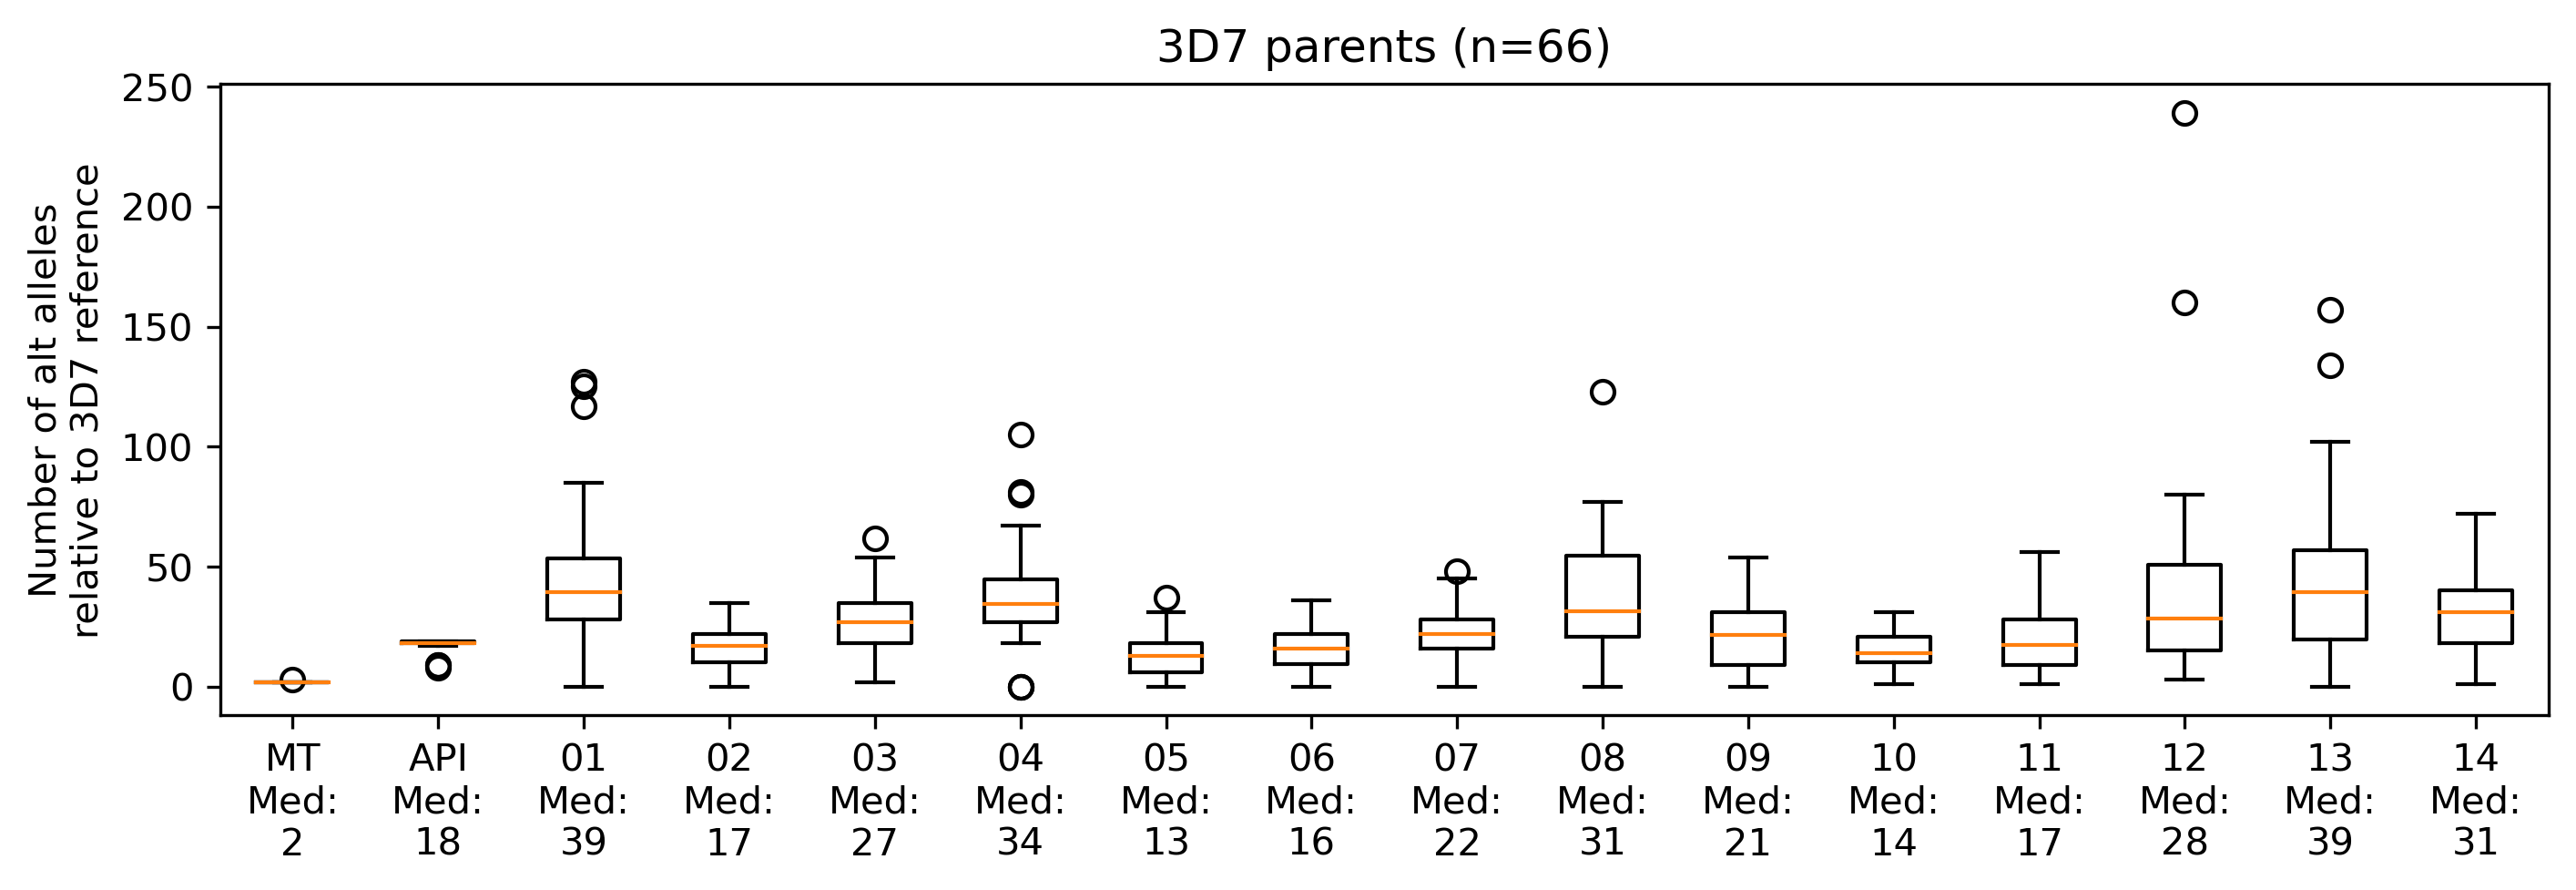

Median number confident alt alleles genome-wide: 376
21 1073


In [16]:
fig, ax = plt.subplots(figsize=(11, 3))

boxplot_data = []
labels = []

for i in range(len(chromosomes)):
    chrom = chromosomes[i]
    chrom_abbr = chrom_to_abbreviation(chrom)
    boxplot_data.append(chrom_alt_count_dict[chrom])
    labels.append(chrom_abbr + '\n' + f"Med:\n{int(np.median(chrom_alt_count_dict[chrom]))}")

ax.boxplot(boxplot_data, vert=True, labels=labels)
ax.set_title("3D7 parents (n=%i)" % len(ordered_samples))
ax.set_ylabel("Number of alt alleles\nrelative to 3D7 reference")
plt.show()

print("Median number confident alt alleles genome-wide: %i" % int(np.median(genome_alt_counts)))
print(int(min(genome_alt_counts)), int(max(genome_alt_counts)))

In [17]:
# Common missense SNPs
parent3D7_allele_sharing_dict, parent3D7_allele_anno_dict = compute_allele_sharing_dict(parent3D7_mutation_records_dict)
for chrom in parent3D7_allele_sharing_dict:
    print(chrom)
    for mutation, count in sorted(parent3D7_allele_sharing_dict[chrom].items(), key=lambda x: x[1], reverse=True):
        vtype, effect, impact, aa_change, gene = parent3D7_allele_anno_dict[chrom][mutation]
        gene_desc = chrom_gene_desc_dict[chrom][gene] if gene in chrom_gene_desc_dict[chrom] else gene
        pos, allele = mutation
        if count/float(len(parent3D7_mutation_records_dict)) > 0.2:
            if vtype == 'SNP' and effect == 'missense_variant':
                items = [count, vtype, mutation, effect, aa_change, gene_desc]
                print('\t'.join([str(item) for item in items]))
    print('')

M76611

PFC10_API_IRAB

Pf3D7_01_v3

Pf3D7_02_v3

Pf3D7_03_v3

Pf3D7_04_v3

Pf3D7_05_v3
26	SNP	(871339, 'T')	missense_variant	p.Glu1078Lys/c.3232G>A	conserved Plasmodium protein, unknown function

Pf3D7_06_v3
44	SNP	(727227, 'A')	missense_variant	p.Asp1422Tyr/c.4264G>T	erythrocyte membrane protein 1, PfEMP1 (VAR)
44	SNP	(1002935, 'A')	missense_variant	p.Glu1138Lys/c.3412G>A	SNF2 helicase, putative (ISWI)

Pf3D7_07_v3
44	SNP	(1038100, 'T')	missense_variant	p.His2589Asn/c.7765C>A	conserved Plasmodium protein, unknown function

Pf3D7_08_v3
15	SNP	(1080639, 'T')	missense_variant	p.Asp785Asn/c.2353G>A	conserved Plasmodium protein, unknown function
14	SNP	(1080637, 'T')	missense_variant	p.Asp785Glu/c.2355T>A	conserved Plasmodium protein, unknown function

Pf3D7_09_v3
42	SNP	(30680, 'T')	missense_variant	p.Thr83Lys/c.248C>A	rifin,PIR protein (RIF)
42	SNP	(30683, 'T')	missense_variant	p.Thr82Asn/c.245C>A	rifin,PIR protein (RIF)
42	SNP	(30684, 'C')	missense_variant	p.Thr82Ala/c.244A>G	rifin,PIR

In [18]:
# Common other genic SNPs
parent3D7_allele_sharing_dict, parent3D7_allele_anno_dict = compute_allele_sharing_dict(parent3D7_mutation_records_dict)
for chrom in parent3D7_allele_sharing_dict:
    print(chrom)
    for mutation, count in sorted(parent3D7_allele_sharing_dict[chrom].items(), key=lambda x: x[1], reverse=True):
        vtype, effect, impact, aa_change, gene = parent3D7_allele_anno_dict[chrom][mutation]
        gene_desc = chrom_gene_desc_dict[chrom][gene] if gene in chrom_gene_desc_dict[chrom] else gene
        pos, allele = mutation
        if count/float(len(parent3D7_mutation_records_dict)) > 0.2:
            if vtype == 'SNP' and effect != 'missense_variant' and effect != "intergenic_region":
                items = [count, vtype, mutation, effect, aa_change, gene_desc]
                print('\t'.join([str(item) for item in items]))
    print('')

M76611
66	SNP	(772, 'C')	downstream_gene_variant	n.*607T>C	malmito_rna_17%3ArRNA

PFC10_API_IRAB
66	SNP	(9004, 'C')	synonymous_variant	p.Ser658Ser/c.1974T>C	RNA polymerase B (rpoB)
66	SNP	(17915, 'A')	downstream_gene_variant	c.*981C>T	PFC10_API0023%3AtRNA
66	SNP	(18694, 'A')	downstream_gene_variant	c.*750C>T	elongation factor (tufA)
66	SNP	(18828, 'T')	downstream_gene_variant	c.*616C>A	elongation factor (tufA)
66	SNP	(18860, 'A')	downstream_gene_variant	c.*584C>T	elongation factor (tufA)
66	SNP	(22669, 'T')	downstream_gene_variant	c.*876G>A	apicoplast ribosomal protein S8 (rps8)
66	SNP	(29000, 'T')	downstream_gene_variant	n.*204G>A	PFC10_API0057%3ArRNA
65	SNP	(29019, 'T')	downstream_gene_variant	n.*185G>A	PFC10_API0057%3ArRNA
64	SNP	(23796, 'C')	downstream_gene_variant	c.*728A>G	apicoplast ribosomal protein L16 (rpl16)

Pf3D7_01_v3

Pf3D7_02_v3

Pf3D7_03_v3
44	SNP	(837583, 'G')	stop_gained	p.Ser30*/c.89C>G	protein phosphatase inhibitor 2 (I2)

Pf3D7_04_v3

Pf3D7_05_v3
36	SNP	(1083232, 

In [41]:
# Common indels
parent3D7_allele_sharing_dict, parent3D7_allele_anno_dict = compute_allele_sharing_dict(parent3D7_mutation_records_dict)
for chrom in parent3D7_allele_sharing_dict:
    print(chrom)
    for mutation, count in sorted(parent3D7_allele_sharing_dict[chrom].items(), key=lambda x: x[1], reverse=True):
        vtype, effect, impact, aa_change, gene = parent3D7_allele_anno_dict[chrom][mutation]
        gene_desc = chrom_gene_desc_dict[chrom][gene] if gene in chrom_gene_desc_dict[chrom] else gene
        pos, allele = mutation
        if count/float(len(parent3D7_mutation_records_dict)) > 0.5:
            if vtype == 'INDEL':
                items = [count, vtype, mutation, effect, aa_change, gene_desc]
                print('\t'.join([str(item) for item in items]))
    print('')

M76611

PFC10_API_IRAB
48	INDEL	(15405, 'A')	frameshift_variant	p.Leu210fs/c.628_641delTTAAAAATATGTAA	apicoplast ribosomal protein S2 (rps2)
48	INDEL	(17266, 'ATAT')	inframe_insertion	p.Asn410dup/c.1229_1231dupATA	molecular chaperone (Clp (C?))
48	INDEL	(23943, 'AT')	intergenic_region	n.23943_23944insT	
48	INDEL	(23947, 'AT')	frameshift_variant	p.Ter115fs/c.342dupA	apicoplast ribosomal protein L14 (rpl14)
48	INDEL	(25587, 'C')	intergenic_region	n.25588delT	
48	INDEL	(27761, 'T')	frameshift_variant	p.Ser4fs/c.9delT	PFC10_API0047%3AtRNA
48	INDEL	(28008, 'A')	frameshift_variant	p.Asn17fs/c.50delA	PFC10_API0050%3AtRNA
48	INDEL	(28127, 'GA')	intergenic_region	n.28127_28128insA	
44	INDEL	(25869, 'AT')	intergenic_region	n.25869_25870insT	

Pf3D7_01_v3
48	INDEL	(293766, 'G')	splice_donor_variant+splice_region_variant+intron_variant	c.124+2_124+15delTAAATAATAAATAA	centrin-1 (CEN1)
47	INDEL	(190317, 'C')	disruptive_inframe_deletion	p.Asn25_Asn26del/c.74_79delATAATA	ubiquitin carboxyl-terminal hy

## Characterize Dd2 parents

In [32]:
parentDd2_mutation_records_dict = {}
for sample in strain_parent_vcfs['Dd2']:
    if sample == 'ParentDd2' or sample == 'GSK-MMV903582-Parent23':
        continue
    try:
        mutation_records = get_all_variants(sample)
        parentDd2_mutation_records_dict[sample] = mutation_records
    except:
        continue

print(len(parentDd2_mutation_records_dict))

71


In [33]:
# Distribution of number of alt alleles per chromosome
# Start with non-het mutations (1/1, 1/2, etc.)

chrom_alt_count_dict = defaultdict(list)
ordered_samples = sorted(parentDd2_mutation_records_dict.keys())
genome_alt_counts = np.zeros(len(ordered_samples))

for chrom in chromosomes:
    for idx, sample in enumerate(ordered_samples):
        num_confident_alt_alleles = 0
        for pos in parentDd2_mutation_records_dict[sample][chrom]:
            REF, ALT, QUAL, GT, AD, major_alt_allele, vtype, effect, impact, aa_change, gene \
                = parentDd2_mutation_records_dict[sample][chrom][pos]
            if not GT.startswith('0/'):
                num_confident_alt_alleles += 1
        chrom_alt_count_dict[chrom].append(num_confident_alt_alleles)
        genome_alt_counts[idx] += num_confident_alt_alleles

for sample, genome_alt_count in zip(ordered_samples, genome_alt_counts):
    if genome_alt_count < 20000:
        print(sample, genome_alt_count)

Dd2Parent 2817.0
Erika-Dd2ParentPQR 7154.0
SRR3239848-GNF179-S1-Dd2-Parent 6053.0
Wirth-MMV019721-Dd2-RS2D-P1-130319Dd2 13503.0


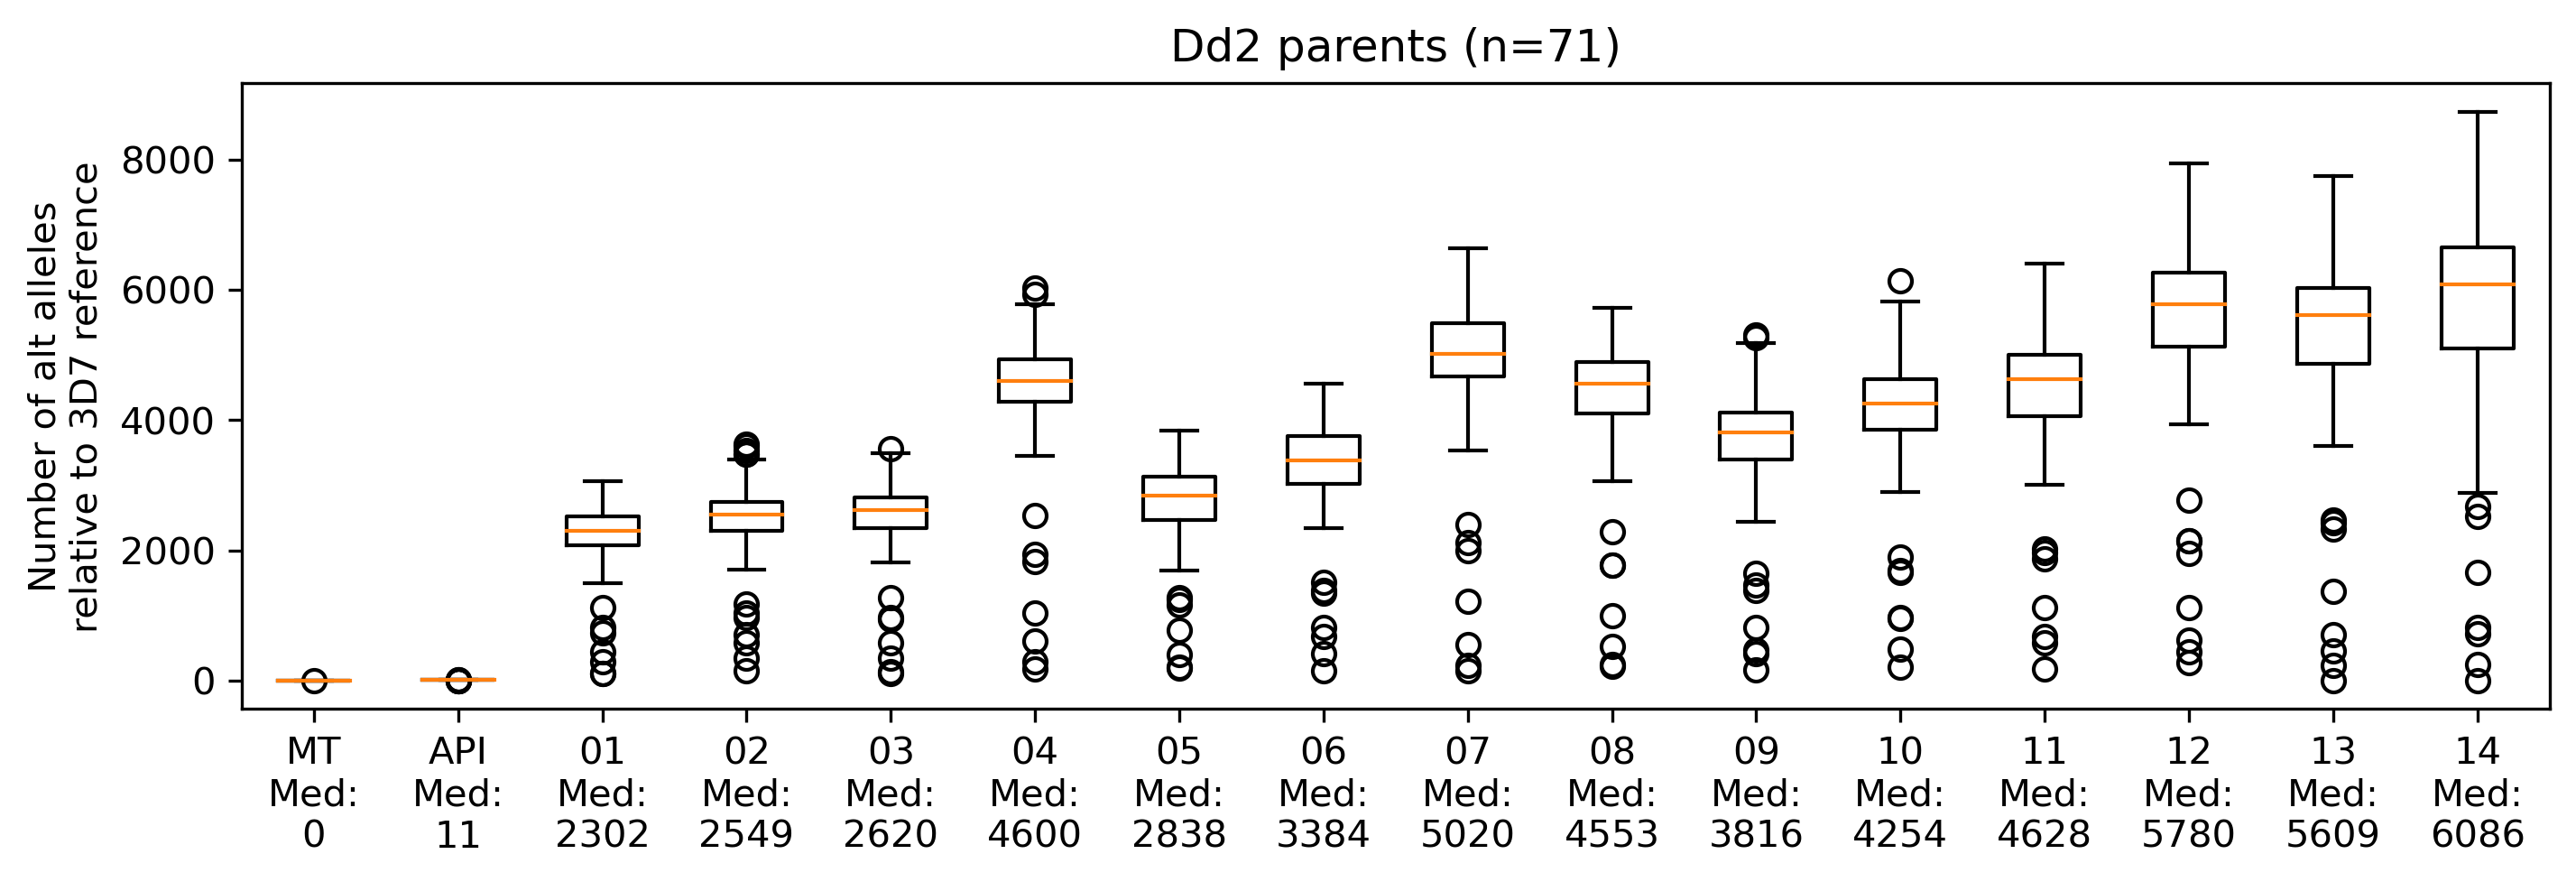

Median number confident alt alleles genome-wide: 57984
2817 78137


In [34]:
fig, ax = plt.subplots(figsize=(11, 3))

boxplot_data = []
labels = []

for i in range(len(chromosomes)):
    chrom = chromosomes[i]
    chrom_abbr = chrom_to_abbreviation(chrom)
    boxplot_data.append(chrom_alt_count_dict[chrom])
    labels.append(chrom_abbr + '\n' + f"Med:\n{int(np.median(chrom_alt_count_dict[chrom]))}")

ax.boxplot(boxplot_data, vert=True, labels=labels)
ax.set_title("Dd2 parents (n=%i)" % len(ordered_samples))
ax.set_ylabel("Number of alt alleles\nrelative to 3D7 reference")
plt.show()

print("Median number confident alt alleles genome-wide: %i" % int(np.median(genome_alt_counts)))
print(int(min(genome_alt_counts)), int(max(genome_alt_counts)))

Wonder if I do PCA, get clusters by lab...

In [35]:
# Common missense SNPs
parentDd2_allele_sharing_dict, parentDd2_allele_anno_dict = compute_allele_sharing_dict(parentDd2_mutation_records_dict)
for chrom in parentDd2_allele_sharing_dict:
    print(chrom)
    for mutation, count in sorted(parentDd2_allele_sharing_dict[chrom].items(), key=lambda x: x[1], reverse=True):
        vtype, effect, impact, aa_change, gene = parentDd2_allele_anno_dict[chrom][mutation]
        gene_desc = chrom_gene_desc_dict[chrom][gene] if gene in chrom_gene_desc_dict[chrom] else gene
        pos, allele = mutation
        if count/float(len(parentDd2_mutation_records_dict)) > 0.2:
            if vtype == 'SNP' and effect == 'missense_variant':
                items = [count, vtype, mutation, effect, aa_change, gene_desc]
                print('\t'.join([str(item) for item in items]))
    print('')

M76611

PFC10_API_IRAB

Pf3D7_01_v3
70	SNP	(101269, 'T')	missense_variant	p.Val749Leu/c.2245G>T	ring-infected erythrocyte surface antigen (RESA)
70	SNP	(148490, 'C')	missense_variant	p.Ser1430Ala/c.4288T>G	zinc-carboxypeptidase, putative
70	SNP	(410642, 'G')	missense_variant	p.Leu1540Val/c.4618T>G	phosphatidylinositol-4-phosphate 5-kinase (PIP5K)
70	SNP	(496106, 'T')	missense_variant	p.Ser288Phe/c.863C>T	surface-associated interspersed protein 1.1 (SURFIN 1.1) (SURF1.1)
70	SNP	(505527, 'C')	missense_variant	p.Lys389Arg/c.1166A>G	Plasmodium exported protein (hyp1), unknown function
70	SNP	(512670, 'A')	missense_variant	p.Asp195Glu/c.585T>A	surface-associated interspersed protein 1.2 (SURFIN 1.2), pseudogene (SURF1.2)
70	SNP	(512697, 'T')	missense_variant	p.Glu204Asp/c.612G>T	surface-associated interspersed protein 1.2 (SURFIN 1.2), pseudogene (SURF1.2)
70	SNP	(533141, 'C')	missense_variant	p.Glu1923Ala/c.5768A>C	DBL containing protein, unknown function
70	SNP	(543381, 'A')	missense_vari


Pf3D7_11_v3
70	SNP	(194304, 'T')	missense_variant	p.Cys19Ser/c.55T>A	conserved Plasmodium protein, unknown function
70	SNP	(241962, 'T')	missense_variant	p.Ile519Asn/c.1556T>A	translocon component PTEX88 (PTEX88)
70	SNP	(242019, 'C')	missense_variant	p.Lys500Arg/c.1499A>G	translocon component PTEX88 (PTEX88)
70	SNP	(306125, 'A')	missense_variant	p.Lys1721Asn/c.5163A>T	polyadenylate-binding protein-interacting protein 1, putative (PAIP1)
70	SNP	(354078, 'A')	missense_variant	p.Ser508Asn/c.1523G>A	IWS1-like protein, putative
70	SNP	(401979, 'A')	missense_variant	p.Asp432Asn/c.1294G>A	conserved Plasmodium protein, unknown function
70	SNP	(507067, 'A')	missense_variant	p.Gly4700Ser/c.14098G>A	conserved Plasmodium protein, unknown function
70	SNP	(596563, 'C')	missense_variant	p.Lys214Arg/c.641A>G	conserved Plasmodium protein, unknown function
70	SNP	(631998, 'G')	missense_variant	p.Asp295Ala/c.884A>C	cathepsin C, homolog,dipeptidyl aminopeptidase 1 (DPAP1)
70	SNP	(637751, 'G')	missense_va

In [30]:
parentW2_mutation_records_dict = {}
for sample in strain_parent_vcfs['Thies (Senegal)']:
    try:
        mutation_records = get_all_variants(sample)
        parentW2_mutation_records_dict[sample] = mutation_records
    except:
        continue

print(len(parentW2_mutation_records_dict))

# Distribution of number of alt alleles per chromosome
# Start with non-het mutations (1/1, 1/2, etc.)

chrom_alt_count_dict = defaultdict(list)
ordered_samples = sorted(parentW2_mutation_records_dict.keys())
genome_alt_counts = np.zeros(len(ordered_samples))

for chrom in chromosomes:
    for idx, sample in enumerate(ordered_samples):
        num_confident_alt_alleles = 0
        for pos in parentW2_mutation_records_dict[sample][chrom]:
            REF, ALT, QUAL, GT, AD, major_alt_allele, vtype, effect, impact, aa_change, gene \
                = parentW2_mutation_records_dict[sample][chrom][pos]
            if not GT.startswith('0/'):
                num_confident_alt_alleles += 1
        chrom_alt_count_dict[chrom].append(num_confident_alt_alleles)
        genome_alt_counts[idx] += num_confident_alt_alleles

for sample, genome_alt_count in zip(ordered_samples, genome_alt_counts):
    if genome_alt_count < 20000:
        print(sample, genome_alt_count)

1


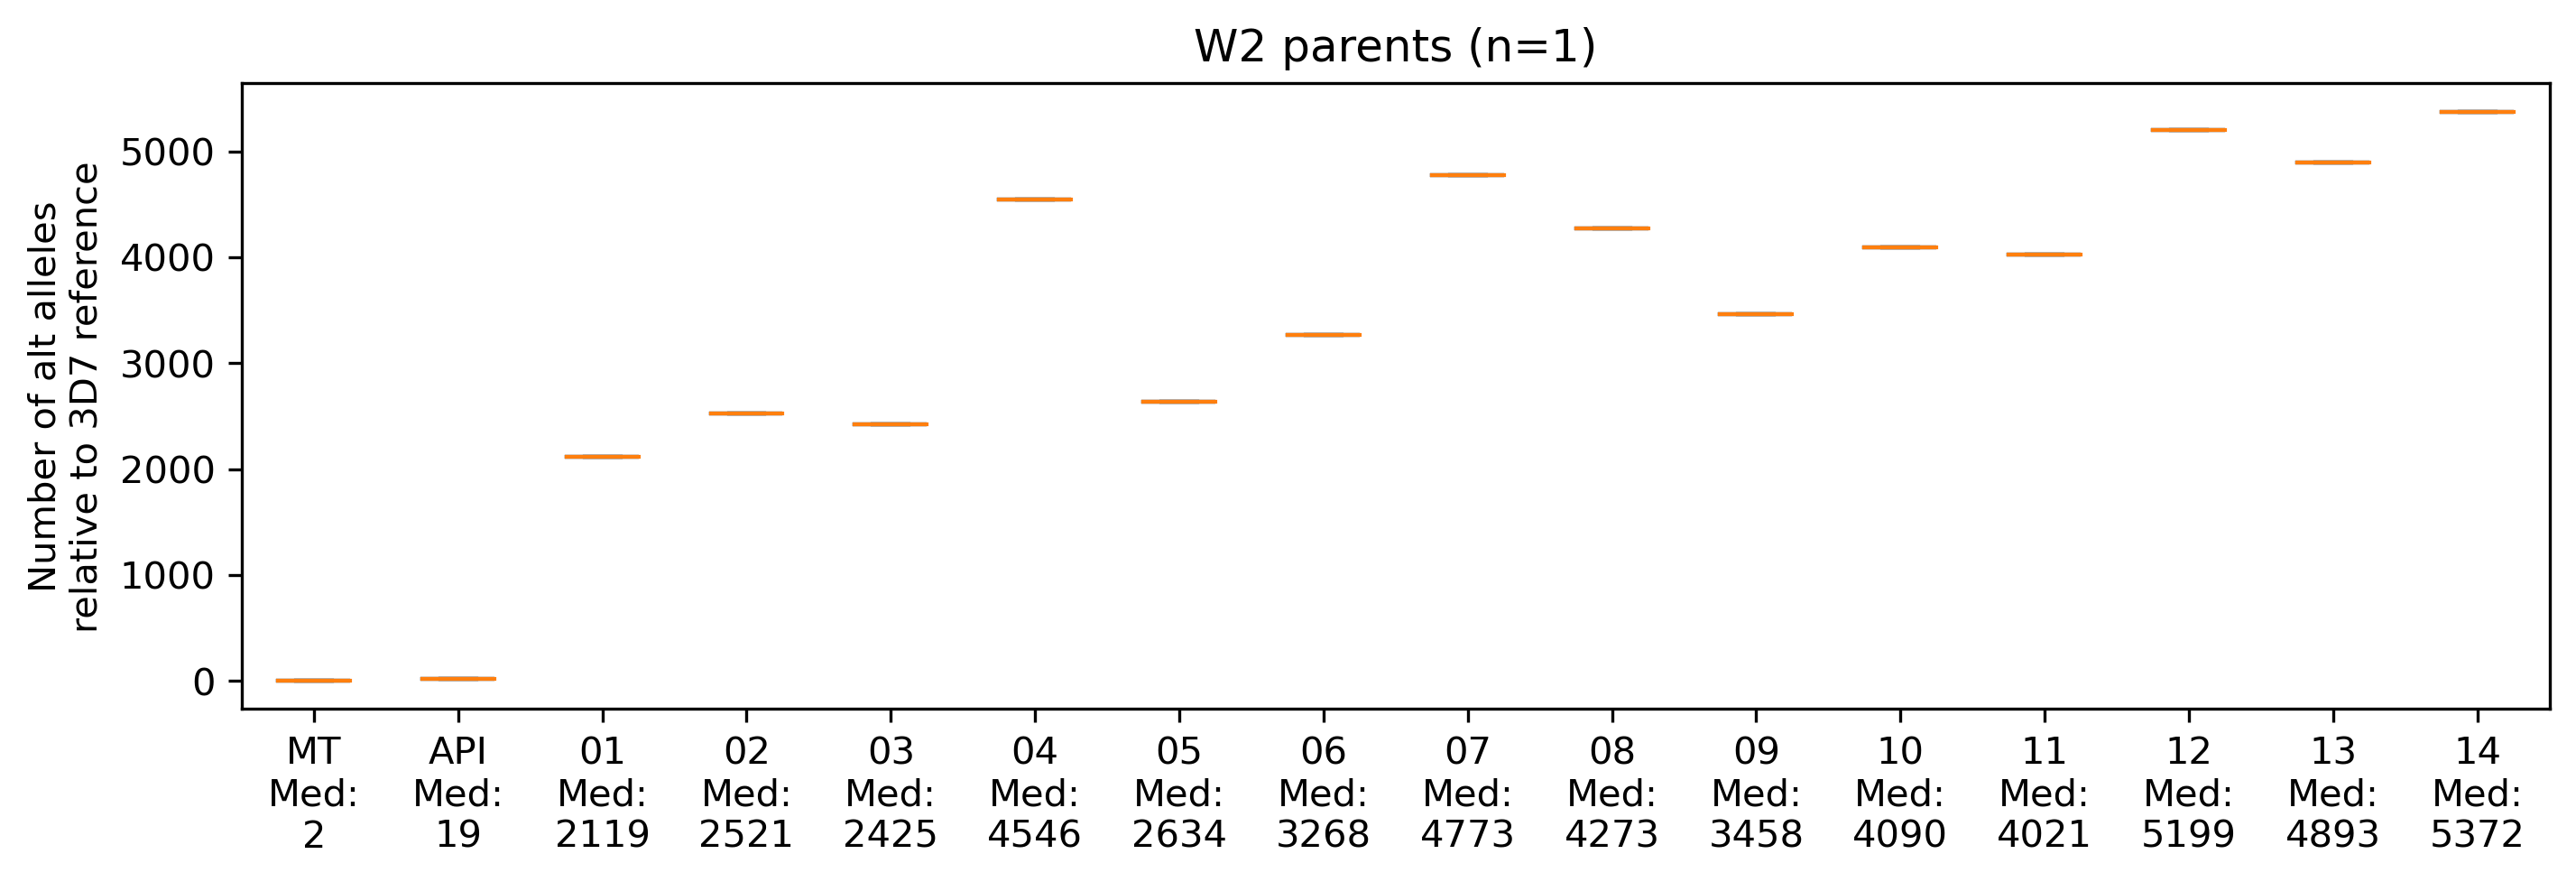

Median number confident alt alleles genome-wide: 53613
53613 53613


In [31]:
fig, ax = plt.subplots(figsize=(11, 3))

boxplot_data = []
labels = []

for i in range(len(chromosomes)):
    chrom = chromosomes[i]
    chrom_abbr = chrom_to_abbreviation(chrom)
    boxplot_data.append(chrom_alt_count_dict[chrom])
    labels.append(chrom_abbr + '\n' + f"Med:\n{int(np.median(chrom_alt_count_dict[chrom]))}")

ax.boxplot(boxplot_data, vert=True, labels=labels)
ax.set_title("W2 parents (n=%i)" % len(ordered_samples))
ax.set_ylabel("Number of alt alleles\nrelative to 3D7 reference")
plt.show()

print("Median number confident alt alleles genome-wide: %i" % int(np.median(genome_alt_counts)))
print(int(min(genome_alt_counts)), int(max(genome_alt_counts)))